# Final Project 2 - Kampus Merdeka Batch 3

Group 4 :
- Alifina Aulia Azzahra
- Wanwha Sonia Putri A.S 

### Project Overview

Dataset yang digunakan adalah Dataset yang diperoleh dari Kaggle yaitu data "Rain in Australia". Dataset tersebut memuat data observasi cuaca harian di wilayah Australia selama 10 tahun. Dataset terdiri dari 145460 observasi dan 23 fitur.

Tujuan dari project ini adalah untuk memprediksi cuaca di wilayah Australia, apakah besok akan turun hujan atau tidak.

Oleh karena itu, variabel target yang akan diprediksi adalah "RainTomorrow" yang dianalisis berdasarkan 6 fitur yang paling sesuai.

Project ini menerapkan Supervised Machine Learning yaitu metode Classification. Algoritma yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). 

# Import pustaka yang digunakan

In [183]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Data Loading

In [184]:
#Membaca data
df = pd.read_csv("weatherAUS.csv")

In [185]:
#Mengetahui dimensi data
df.shape

(145460, 23)

In [186]:
#Melihat data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [187]:
#Mengetahui daftar kolom pada data beserta tipenya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Berdasarkan informasi di atas, diketahui bahwa data terdiri dari 145460 baris dan 23 kolom. Terdapat 7 kolom dengan tipe data object dan 16 kolom bertipe data float. Dari 23 kolom, hanya 2 kolom yang berisi data tidak null, yakni kolom Date dan Location. Artinya, masih banyak ditemukan missing value yang harus dibersihkan pada data sebelum mengolahnya lebih lanjut.

# Data Cleaning

## Check the duplicated values

In [188]:
df.duplicated().sum()

0

Karena duplicated values=0 berarti tidak ada duplicated value pada dataset. Selanjutnya cek apakah terdapat missing values pada data.

## Check the missing values

In [189]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [190]:
df.drop("Date", axis=1, inplace=True)

## Filling the missing values for numerical values

In [191]:
#Mencari kolom yang bertipe data selain object
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [192]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [193]:
#Mengisi numerical variables dengan median
df = df.fillna(df.median())
df.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

## Drop the missing value in categorical values

In [194]:
# Menghilangkan missing values pada kolom WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=0, inplace=True)

In [195]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [196]:
df.shape

(123710, 22)

## Check Outliers

In [197]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  123710.0  123710.0  123710.0     123710.0  123710.0       123710.0   
mean       12.0      23.0       2.0          5.0       8.0           41.0   
std         6.0       7.0       9.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      29.0       1.0          6.0       9.0           48.0   
max        34.0      48.0     368.0         86.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      123710.0      123710.0     123710.0     123710.0     123710.0   
mean           15.0          19.0         68.0         51.0       1017.0   
std             8.0           9.0         19.0         21.0          7.0   
mi

Berdasarkan data di atas, terlihat jika Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, dan WindSpeed3pm memiliki jumlah outliers yang lebih banyak jika dibandingkan dengan kolom lain.

Text(0, 0.5, 'WindSpeed9am')

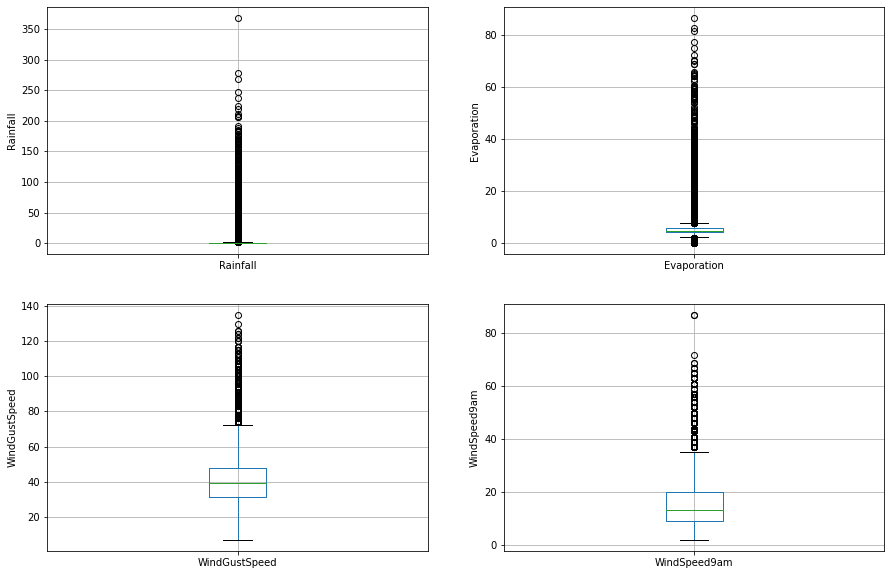

In [198]:
# Membuat box plots untuk memvisualisasikan outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

Text(0, 0.5, 'WindSpeed3pm')

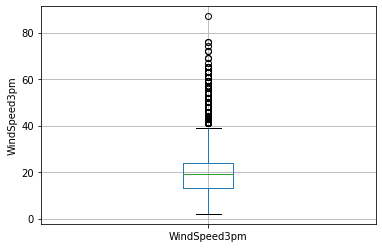

In [199]:
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

## Finding the Outliers

Mengecek apakah variabel Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, dan WindSpeed3pm berdistribusi normal atau skewed dengan menggunakan plot histogram.

Text(0, 0.5, 'RainTomorrow')

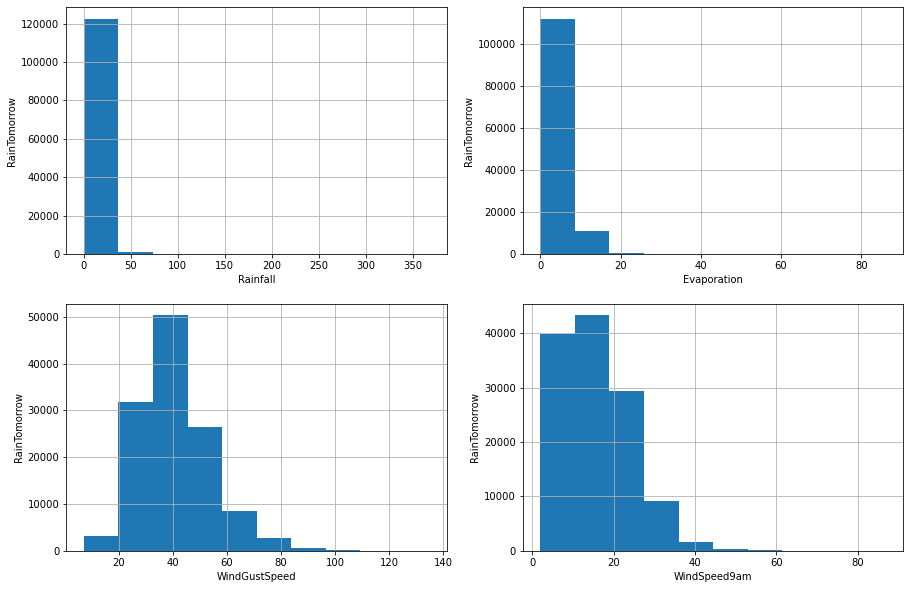

In [200]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

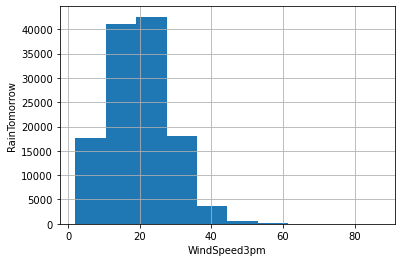

In [201]:
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Berdasarkan plot histagram di atas, terlihat jika semua variabel berdistribusi skewed. Sehingga digunakan interquantile range untuk mencari outliers.

In [202]:
# Handling outlier menggunakan IQR
Q1 = (df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]).quantile(0.25)
Q3 = (df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]).quantile(0.75)

In [203]:
IQR= Q3-Q1

In [204]:
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

In [205]:
print('Nilai Maximum dari masing-masing Variable adalah: ', maximum)

Nilai Maximum dari masing-masing Variable adalah:  Rainfall          2.0
Evaporation       7.7
WindGustSpeed    73.5
WindSpeed9am     36.5
WindSpeed3pm     40.5
dtype: float64


In [206]:
print('Nilai Minimum dari masing-masing Variable adalah: ', minimum)

Nilai Minimum dari masing-masing Variable adalah:  Rainfall        -1.2
Evaporation      2.1
WindGustSpeed    5.5
WindSpeed9am    -7.5
WindSpeed3pm    -3.5
dtype: float64


In [207]:
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

In [208]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].describe())


Persebaran data setelah ditangani Outlier: 
            Rainfall   Evaporation  WindGustSpeed   WindSpeed9am  \
count  123710.000000  123710.00000  123710.000000  123710.000000   
mean        0.486650       4.89197      40.482237      14.915330   
std         0.793145       1.66876      12.746265       7.985716   
min         0.000000       2.10000       7.000000       2.000000   
25%         0.000000       4.20000      31.000000       9.000000   
50%         0.000000       4.80000      39.000000      13.000000   
75%         0.800000       5.60000      48.000000      20.000000   
max         2.000000       7.70000      73.500000      36.500000   

        WindSpeed3pm  
count  123710.000000  
mean       19.085991  
std         8.292947  
min         2.000000  
25%        13.000000  
50%        19.000000  
75%        24.000000  
max        40.500000  


Text(0, 0.5, 'WindSpeed9am')

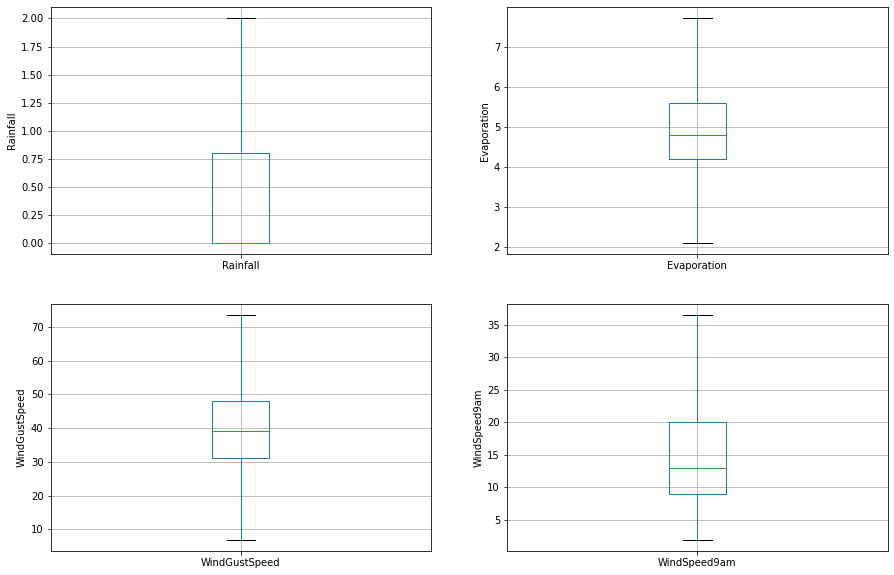

In [209]:
# Membuat box plots untuk memvisualisasikan data setelah handling outlier

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

Text(0, 0.5, 'WindSpeed3pm')

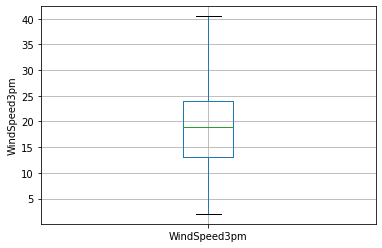

In [210]:
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [211]:
df.shape

(123710, 22)

# Exploratory Data Analysis (EDA)

In [212]:
# Mengubah value pada kolom RainTomorrow dan RainToday
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [213]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
6,Albury,14.3,25.0,0.0,4.8,8.4,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0,0
7,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
8,Albury,9.7,31.9,0.0,4.8,8.4,NNW,73.5,SE,NW,...,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,1
9,Albury,13.1,30.1,1.4,4.8,8.4,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,0


Karena tujuan kita adalah memprediksi apakah besok terjadi hujan atau tidak (RainTomorrow) maka perlu dilakukan analisis terhadap :

1. Kemungkinan hari esok terjadi hujan atau tidak (RainTomorrow)
2. Pengaruh data numerik (numerical values) terhadap RainTomorrow
3. Pengaruh data kategori (categorical values) terhadap RainTomorrow

## Measure of Central Tendency

In [214]:
df['RainTomorrow'].mode()

0    0
Name: RainTomorrow, dtype: int64

Dapat diketahui bahwa data terbanyak pada kolom "RainTomorrow" adalah 0 atau No. Sehingga dapat disimpulkan jika sebagian besar prediksi hujan untuk hari esok adalah No atau tidak terjadi hujan.

## Measure of Spread/Dispersion (Variability)

In [215]:
#Mengetahui ukuran penyebaran data melalui standar deviasi
std_rt = df['RainTomorrow'].std(ddof=1)
print("Deviasi standar untuk RainTomorrow : ", std_rt)

Deviasi standar untuk RainTomorrow :  0.41520497436447606


In [216]:
#Mengetahui ukuran penyebaran data melalui skewness
df['RainTomorrow'].skew()

1.3419080002397141

## Measure of Correlation dan Penerapannya

In [217]:
# Perbandingan RainTomorrow berdasarkan Lokasi
df_loc = df.groupby(by='Location').sum()
df_loc = df_loc[['RainTomorrow']]
df_loc

,RainTomorrow
Location,
Adelaide,626
Albury,529
AliceSprings,228
BadgerysCreek,494
Ballarat,758
Bendigo,517
Brisbane,662
Cairns,910
Canberra,508


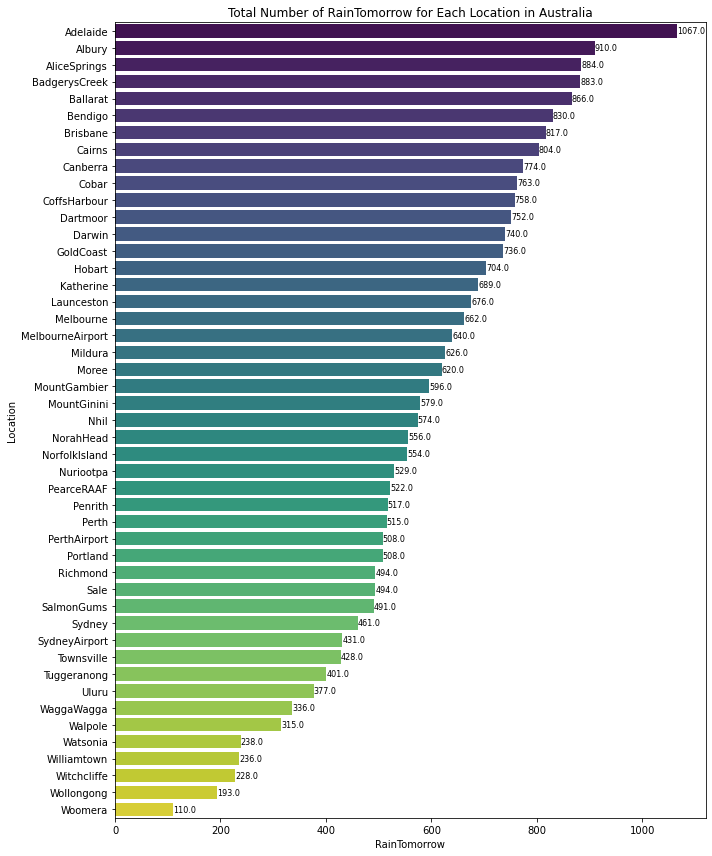

In [218]:
plt.figure(figsize=(10, 12))
p = sns.barplot(x='RainTomorrow', 
            y=df_loc.index, 
            data=df_loc.sort_values('RainTomorrow', ascending=False), 
            orient='h',palette='viridis'
           )

plt.title('Total Number of RainTomorrow for Each Location in Australia')
plt.tight_layout()
for container in p.containers:
    p.bar_label(container,size=8,fmt='%.1f')

In [219]:
df_loc.groupby('Location')['RainTomorrow'].mean()

Location
Adelaide             626.0
Albury               529.0
AliceSprings         228.0
BadgerysCreek        494.0
Ballarat             758.0
Bendigo              517.0
Brisbane             662.0
Cairns               910.0
Canberra             508.0
Cobar                377.0
CoffsHarbour         763.0
Dartmoor             830.0
Darwin               817.0
GoldCoast            736.0
Hobart               740.0
Katherine            238.0
Launceston           574.0
Melbourne            522.0
MelbourneAirport     640.0
Mildura              315.0
Moree                336.0
MountGambier         883.0
MountGinini          704.0
Nhil                 236.0
NorahHead            774.0
NorfolkIsland        884.0
Nuriootpa            554.0
PearceRAAF           401.0
Penrith              494.0
Perth                620.0
PerthAirport         556.0
Portland            1067.0
Richmond             428.0
Sale                 579.0
SalmonGums           461.0
Sydney               596.0
SydneyAirport      

Berdasarkan barplot dan informasi di atas, diketahui bahwa daerah Adelaide memiliki jumlah rata-rata prediksi terjadinya hujan pada hari esok lebih tinggi dibandingkan daerah lainnya.

## Count Plot of Target Column

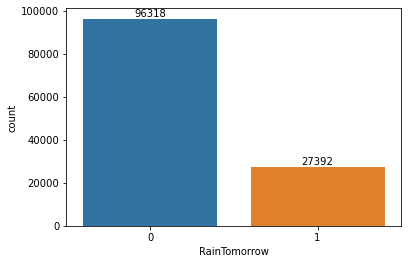

In [220]:
ax = sns.countplot(x=df['RainTomorrow'])
for i in ax.containers:
    ax.bar_label(i,)

Terlihat bahwa jumlah 'No' pada kolom RainTomorrow adalah sebanyak 96318 data, sedangkan untuk jumlah 'Yes' adalah 27392. Lalu, akan dilihat Count Plot pada kolom RainTomorrow untuk setiap daerah di Australia.

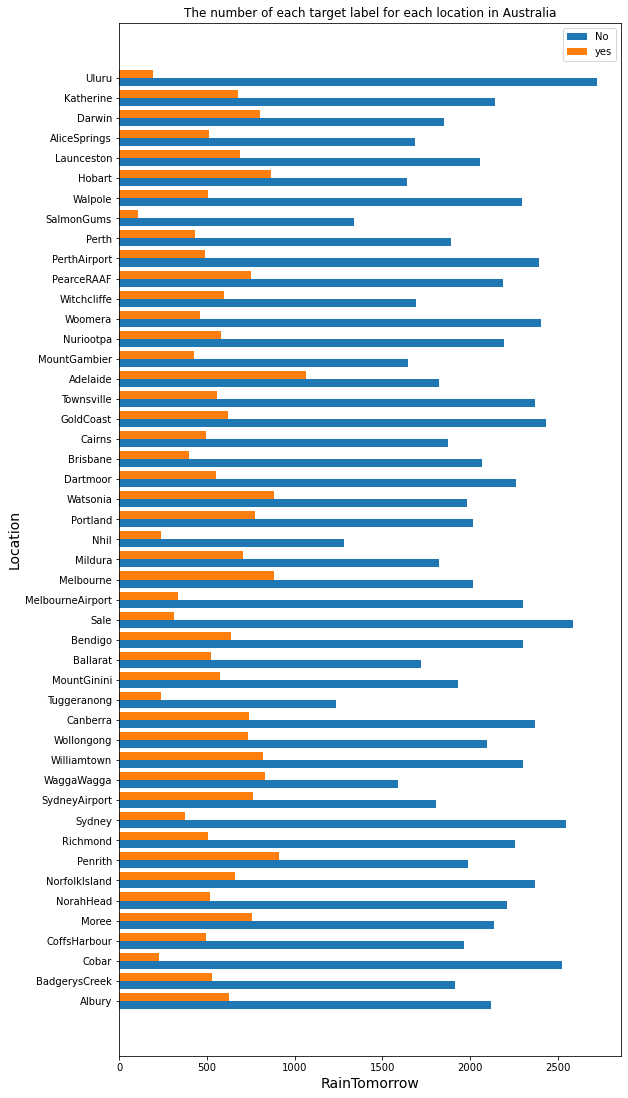

In [221]:
# Target 'No' berdasarkan kota
no = df[(df['RainTomorrow']==0)].groupby('Location').count()['RainTomorrow'].values

# Target 'Yes' berdasarkan kota
yes = df[(df['RainTomorrow']==1)].groupby('Location').count()['RainTomorrow'].values

# Visualisasi
sumbu_y_ticks = list(df['Location'].unique())
sumbu_y_axis = np.arange(0,len(sumbu_y_ticks),1)

plt.figure(figsize=(9,19))
plt.barh(sumbu_y_axis-0.2, no,0.4,label='No')
plt.barh(sumbu_y_axis + 0.2, yes, 0.4, label = 'yes')
plt.yticks(sumbu_y_axis,sumbu_y_ticks, )
plt.ylabel("Location", fontsize=14)
plt.xlabel("RainTomorrow", fontsize=14)
plt.title("The number of each target label for each location in Australia")
plt.legend()
plt.show()


## Correlation of RainTomorrow with All Attributes

In [222]:
le = LabelEncoder()
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.WindDir9am = le.fit_transform(df.WindDir9am)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

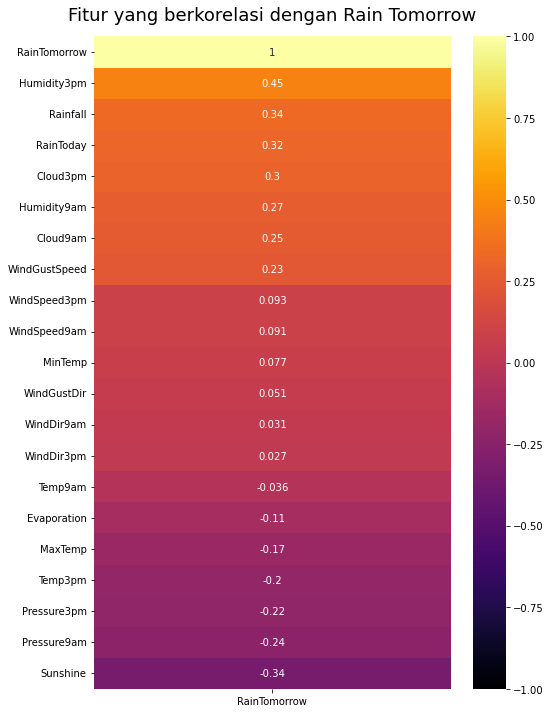

In [224]:
# Melihat korelasi antara data feature dengan data target
plt.figure(figsize=(8, 12))
hm1 = sns.heatmap(df.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='inferno')
hm1.set_title('Fitur yang berkorelasi dengan Rain Tomorrow', fontdict={'fontsize':18}, pad=16);

Dapat dilihat bahwa fitur yang paling berkorelasi dengan kolom 'RainTomorrow' adalah Humidity3pm, Rainfall, RainToday, Cloud3pm, Humidity9am, dan Cloud9am. Sedangkan, fitur dengan korelasi terendah yakni MinTemp, WindGustDir, WindDir9am, WindDir3pm, dan Temp9am.

# Data Preprocessing

## Correlation Analysis

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

In [226]:
# Mengubah kolom location menjadi kolom numerik
df.Location = le.fit_transform(df.Location)

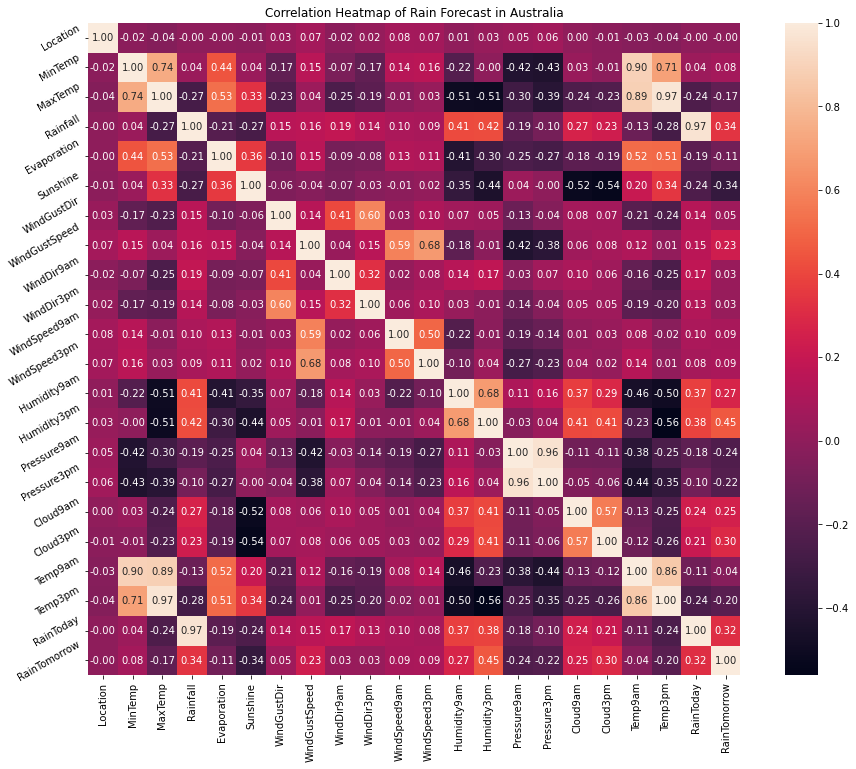

In [227]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain Forecast in Australia')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

## Menghapus kolom multikoliniearitas

Berdasarkan Heatmap terlihat bahwa MaxTemp dan Temp3pm serta Pressure9am dan Pressure3pm memiliki korelasi yang tinggi yaitu secara berturut-turut sebesar 0,98 dan 0,96. Oleh karena itu, salah satu dari dua kolom yang multikolinearitas harus dihapus

In [228]:
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [229]:
df.reset_index(drop=True, inplace=True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int32  
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Cloud9am       123710 non-null  float64
 16  Cloud3pm       123710 non-null  float64
 17  Temp9am        123710 non-nul

## Feature selection

In [231]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [232]:
x_transform = df.drop(["RainTomorrow"], axis=1)
Y= df['RainTomorrow']

In [233]:
# feature selection untuk logistic regression
sfs = SFS(LogisticRegression(),
          n_features_to_select=10)

In [234]:
sfs.fit(x_transform, Y)
sfs.get_feature_names_out()

array(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'RainToday'], dtype=object)

In [235]:
X_fit=df[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday']]

## Splitting dataset

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test= train_test_split(X_fit, Y, test_size=0.20)

# Pendefinisian model

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [239]:
# Logistic Regression
logreg = LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear', random_state=0)

In [240]:
# SVM
svm = svm.SVC(class_weight='balanced', kernel='linear')

# Pelatihan model

In [241]:
# Logistic Regression
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [242]:
# SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluasi model

In [243]:
from sklearn.metrics import f1_score

In [244]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [245]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

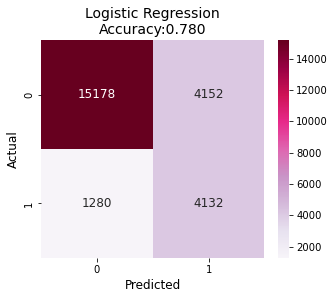

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     19330
           1       0.50      0.76      0.60      5412

    accuracy                           0.78     24742
   macro avg       0.71      0.77      0.73     24742
weighted avg       0.83      0.78      0.79     24742

Accuracy Score: 0.7804542882547895
Precision Score: 0.4987928536938677
Recall Score: 0.7634885439763488
F1 Score: 0.6033878504672897


In [246]:
# Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

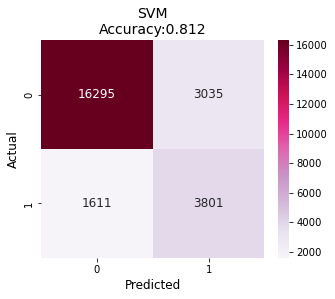

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88     19330
           1       0.56      0.70      0.62      5412

    accuracy                           0.81     24742
   macro avg       0.73      0.77      0.75     24742
weighted avg       0.83      0.81      0.82     24742

Accuracy Score: 0.8122221324064344
Precision Score: 0.5560269163253364
Recall Score: 0.7023281596452328
F1 Score: 0.6206727629000652


In [247]:
# SVM
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

Karena jumlah False negatif tidak mendekati jumlah False positif maka acuan performansi algoritma ditentukan berdasarkan F1 Score. Model Logistic memiliki F1 Score 0.6067. Model SVM memiliki F1 Score sebesar 0.6236. Oleh karena itu, dalam kasus ini algoritma SVM memiliki performa yang lebih baik dari pada Logistic Regression.

# Membangun  model Logistic Regression baru

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int32  
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Cloud9am       123710 non-null  float64
 16  Cloud3pm       123710 non-null  float64
 17  Temp9am        123710 non-nul

In [250]:
df_new= df[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday']]

In [251]:
scaler_ = StandardScaler()
scaler_.fit(df_new)
scaled_features_ = scaler_.transform(df_new)
df_feat_ = pd.DataFrame(scaled_features_, columns= df_new.columns)
df_feat_.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Humidity9am,Pressure9am,Cloud9am,RainToday
0,0.142912,0.1319,0.275985,-1.384978,0.175299,-1.435660,1.466459,-0.537832
1,-0.613573,0.1319,0.275985,-1.241022,-1.247529,-1.007017,0.161442,-0.537832
2,-0.613573,0.1319,0.432894,-1.001096,-1.563714,-1.450440,0.161442,-0.537832
3,-0.613573,0.1319,-1.293108,-1.672890,-1.194832,0.027636,0.161442,-0.537832
4,0.647236,0.1319,0.040621,-0.857140,0.754970,-0.977456,1.031453,-0.537832


In [252]:
df_final_ = df_feat_.copy()

In [253]:
X = df_final_
y = df.RainTomorrow

In [254]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [255]:
svm.fit(X_train1, y_train1)
y_pred_svm = svm.predict(X_test1)

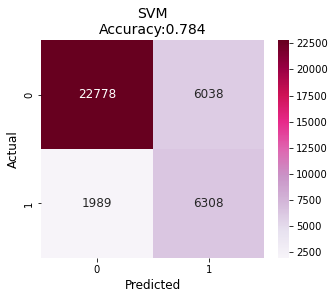

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     28816
           1       0.51      0.76      0.61      8297

    accuracy                           0.78     37113
   macro avg       0.72      0.78      0.73     37113
weighted avg       0.83      0.78      0.80     37113

Accuracy Score:- 0.7837146013526257
Precision Score:- 0.5109347156973919
Recall Score:- 0.7602747981198024
F1 Score: 0.6111514799205542


In [256]:
cm = confusion_matrix(y_test1, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test1, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test1, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test1, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test1,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test1,y_pred_svm)}')
print("F1 Score:",f1_score(y_test1,y_pred_svm))

Karena dengan penambahan fitur diperoleh F1 Score lebih kecil maka selanjutnya fitur yang digunakan hanya fitur 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday' atau tanpa penambahan fitur 

# Model inference

In [257]:
from sklearn.preprocessing import StandardScaler

In [258]:
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [259]:
scaler_ = StandardScaler()
scaler_.fit(X_train, y_train);

Model inference digunakan untuk menguji keakuratan model dengan data berupa data selain yang tersedia pada dataset.

Misalkan di Sydney pada suatu hari terjadi hujan dengan kondisi cuaca sebagai berikut :
1. Intensitas hujan : 0.5 mm
2. Lama waktu cerah dengan cahaya matahari : 6.5
3. Kecepatan angin : 40.7 km/jam
4. Humiditas jam 3 sore : 65.0 %
5. Tekanan udara jam 9 pagi : 1000.1 hpa

In [260]:
Rainfall = float(input("Rainfall (in mm):"))
Sunshine = float(input("Sunshine hour:"))
WindGustSpeed = float(input("Wind Gust Speed:"))
Humidity3pm = float(input("Humidity percentation at 3 PM:"))
Pressure9am = float(input("Pressure at 9 AM:"))
RainToday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))

val = [Rainfall, Sunshine, WindGustSpeed, Humidity3pm, Pressure9am, RainToday]
val = scaler_.transform([val])
val = val.reshape(6,)

print(val)

val_predict = svm.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

Rainfall (in mm):0.5
Sunshine hour:6.5
Wind Gust Speed:40.7
Humidity percentation at 3 PM:65
Pressure at 9 AM:1000.1
Is today raining? Please type 1 for YES and 0 for NO 1
[ 0.01600396 -0.55059382  0.01360861  0.67821392 -2.55635089  1.85784857]
Prediksi bernilai 1, maka akan diprediksi besok turun hujan


# Kesimpulan

Berdasarkan hasil analisis, dapat disimpulkan hahwa :

1. Nilai korelasi antara Location dengan RainTomorrow adalah 0.00 Oleh karena itu, Location tidak mempengaruhi terjadinya hujan keesokan hari di Australia
2. Hasil prediksi cuaca di wilayah Australia untuk menentukan kejadian turun hujan pada keesokan hari dipengaruhi oleh beberapa variabel yaitu 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday'. Variabel tersebut berkorelasi dengan target yaitu RainTomorrow sebesar lebih dari 2
3. Berdasarkan F1 Score kedua model diperoleh bahwa SVM memiliki performa yang lebih baik untuk memprediksi kejadian turun hujan keesokan hari dengan memperhatikan 6 fitur yaitu 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday'.

# Menyimpan model

In [261]:
pickle_file_dir = open("svm.pkl", "wb")

pickle.dump(svm, pickle_file_dir)
pickle_file_dir.close()